In [1]:
import mailbox
import pandas as pd

# Path to your MBOX file
mbox_file = "GmailContent.mbox"

# Initialize lists to store extracted metadata
senders = []
subjects = []
dates = []
recipients = []

# Open the MBOX file
mbox = mailbox.mbox(mbox_file)

# Iterate through the messages in the MBOX file
for message in mbox:
    try:
        senders.append(message['From'])  # Extract sender
        subjects.append(message['Subject'])  # Extract subject
        dates.append(message['Date'])  # Extract date
        recipients.append(message['To'])  # Extract recipient
    except Exception as e:
        print(f"Error processing message: {e}")
        continue

# Create a pandas DataFrame
emails_df = pd.DataFrame({
    'Sender': senders,
    'Recipient': recipients,
    'Subject': subjects,
    'Date': dates
})

# Convert 'Date' column to a standard datetime format
emails_df['Date'] = pd.to_datetime(emails_df['Date'], errors='coerce')

# Save to a CSV file
emails_df.to_csv("emails_metadata.csv", index=False)
print("MBOX file successfully converted to emails_metadata.csv")


MBOX file successfully converted to emails_metadata.csv


In [2]:
emails_df

,Sender,Recipient,Subject,Date
0,"""Expedia.se"" <mail@eg.expedia.com>",<ra.derakhshan@gmail.com>,=?UTF-8?Q?Regler_och_villkor_f=C3=B6r_g=C3=A4s...,2025-01-20 17:04:19-06:00
1,dentsply-jobnotification@noreply12.jobs2web.com,Reza Derakhshan <ra.derakhshan@gmail.com>,New jobs posted from careers.dentsplysirona.com,2025-01-20 08:43:39+00:00
2,"""Anna Orup, Scandinavian Cosmetics"" <anna.orup...",ra.derakhshan@gmail.com,Thank you for your application at Scandinavian...,2025-01-20 08:36:07+00:00
3,LinkedIn <groups-noreply@linkedin.com>,Reza Derakhshan <ra.derakhshan@gmail.com>,=?UTF-8?Q?Don=E2=80=99t_miss_conversations_in_...,2025-01-15 13:23:37+00:00
4,Timma <timma@timma.se>,ra.derakhshan@gmail.com,Din bokning hos Salong Step In fre 2025-1-17 1...,2025-01-17 12:40:21+00:00
...,...,...,...,...
9006,Klarna <noreply@e.klarna.com>,ra.derakhshan@gmail.com,=?UTF-8?Q?L=C3=A4gg_till_Klarna_i_pl=C3=A5nbok...,2024-10-15 08:08:58+00:00
9007,"""Cecilia Jegander, Transdev"" <cecilia.jegander...",ra.derakhshan@gmail.com,=?UTF-8?Q?=C3=85terkoppling_-_Transdev_rekryte...,2024-11-22 15:29:18+00:00
9008,"""Amazon.se"" <auto-confirm@amazon.se>",ra.derakhshan@gmail.com,=?UTF-8?B?WW91ciBBbWF6b24uc2Ugb3JkZXIgb2YgIkxh...,2024-07-13 22:01:40+00:00
9009,=?ISO-8859-1?B?U2FyYWggQnV0Y2hlcg==?= <emails@...,ra.derakhshan@gmail.com,Expert advice on finding your next opportunity...,2025-01-10 14:55:08+00:00


In [4]:
pd.to_datetime(emails_df['Date'], utc=True)

0      2025-01-20 23:04:19+00:00
1      2025-01-20 08:43:39+00:00
2      2025-01-20 08:36:07+00:00
3      2025-01-15 13:23:37+00:00
4      2025-01-17 12:40:21+00:00
                  ...           
9006   2024-10-15 08:08:58+00:00
9007   2024-11-22 15:29:18+00:00
9008   2024-07-13 22:01:40+00:00
9009   2025-01-10 14:55:08+00:00
9010   2024-12-26 19:27:53+00:00
Name: Date, Length: 9011, dtype: datetime64[ns, UTC]

In [7]:
emails_df.Date.dtype

dtype('O')

In [9]:
import pandas as pd
import email.header

# Load the Gmail metadata CSV file
file_path = 'emails_metadata.csv'  # Update this with the actual file path
emails_df = pd.read_csv(file_path)

# Step 1: Clean `Sender` and `Recipient` columns
# Extract email addresses using regex
emails_df['Sender'] = emails_df['Sender'].str.extract(r'<(.+?)>', expand=False).fillna(emails_df['Sender'])
emails_df['Recipient'] = emails_df['Recipient'].str.extract(r'<(.+?)>', 
                                                            expand=False).fillna(emails_df['Recipient'])

# Step 2: Decode encoded subjects
# Function to decode UTF-8 encoded subjects
def decode_subject(subject):
    try:
        decoded_parts = email.header.decode_header(subject)
        return ''.join(
            [part.decode(charset or 'utf-8') if isinstance(part, bytes) else part
             for part, charset in decoded_parts]
        )
    except Exception:
        return subject

emails_df['Subject'] = emails_df['Subject'].apply(decode_subject)

# Step 3: Standardize `Date` column
# Convert to timezone-aware datetime format (UTC)
emails_df['Date'] = pd.to_datetime(emails_df['Date'], errors='coerce', utc=True)

# Step 4: Remove duplicates
emails_df = emails_df.drop_duplicates(subset=['Sender', 'Recipient', 'Subject', 'Date'])

# Step 5: Handle missing values
# Drop rows where critical columns (`Sender`, `Recipient`, `Date`) are missing
emails_df = emails_df.dropna(subset=['Sender', 'Recipient', 'Date'])

# Step 6: Extract additional date features
emails_df['Day'] = emails_df['Date'].dt.date
emails_df['Hour'] = emails_df['Date'].dt.hour
emails_df['Day of Week'] = emails_df['Date'].dt.day_name()

# Save the cleaned data to a new CSV file
output_file = 'cleaned_emails_metadata.csv'  # Update this with the desired output path
emails_df.to_csv(output_file, index=False)

print(f"Cleaned email metadata has been saved to {output_file}")

Cleaned email metadata has been saved to cleaned_emails_metadata.csv


## Experiment Poisson and Exponential Distribution

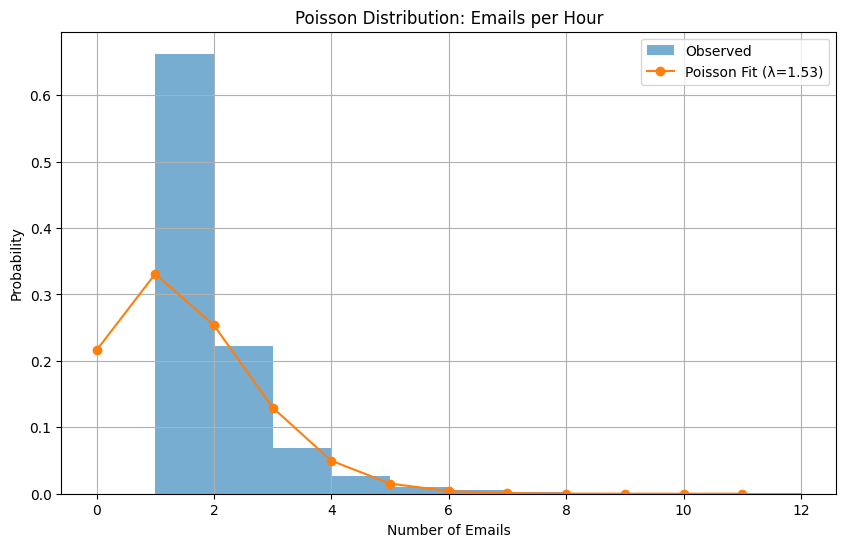

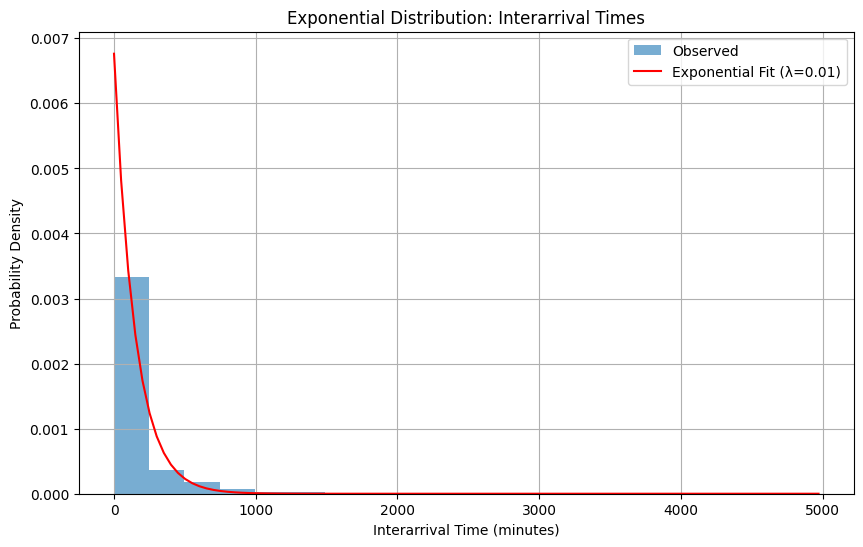

Poisson Distribution (λ): 1.53
Exponential Distribution (λ): 0.01 (mean interarrival time: 147.87 minutes)


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, expon

# Load the cleaned email metadata
file_path = 'cleaned_emails_metadata.csv'  # Update this with your cleaned file path
emails_df = pd.read_csv(file_path)

# Convert 'Date' column to datetime if not already
emails_df['Date'] = pd.to_datetime(emails_df['Date'], utc=True)

# Ensure the data is sorted by date
emails_df = emails_df.sort_values(by='Date')

### 1. Poisson Distribution Analysis
# Group emails by hourly intervals
emails_df['Hour'] = emails_df['Date'].dt.floor('H')  # Group by hour
email_counts = emails_df.groupby('Hour').size()  # Count emails per hour

# Compute the mean of email counts (λ parameter for Poisson distribution)
lambda_poisson = email_counts.mean()

# Plot observed vs Poisson fit
plt.figure(figsize=(10, 6))
plt.hist(email_counts, bins=range(0, max(email_counts) + 2), alpha=0.6, label='Observed', density=True)
x = np.arange(0, max(email_counts) + 1)
plt.plot(x, poisson.pmf(x, lambda_poisson), 'o-', label=f'Poisson Fit (λ={lambda_poisson:.2f})')
plt.title('Poisson Distribution: Emails per Hour')
plt.xlabel('Number of Emails')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

### 2. Exponential Distribution Analysis
# Calculate interarrival times (in minutes)
emails_df['Interarrival Time'] = emails_df['Date'].diff().dt.total_seconds() / 60
interarrival_times = emails_df['Interarrival Time'].dropna()

# Fit Exponential Distribution
lambda_exponential = 1 / interarrival_times.mean()

# Plot observed vs Exponential fit
plt.figure(figsize=(10, 6))
plt.hist(interarrival_times, bins=20, density=True, alpha=0.6, label='Observed')
x = np.linspace(0, interarrival_times.max(), 100)
plt.plot(x, expon.pdf(x, scale=1/lambda_exponential), 'r-', label=f'Exponential Fit (λ={lambda_exponential:.2f})')
plt.title('Exponential Distribution: Interarrival Times')
plt.xlabel('Interarrival Time (minutes)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### Print Summary
print(f"Poisson Distribution (λ): {lambda_poisson:.2f}")
print(f"Exponential Distribution (λ): {lambda_exponential:.2f} (mean interarrival time: {1/lambda_exponential:.2f} minutes)")


In [24]:
email_counts

Hour
2022-07-16 15:00:00+00:00    2
2022-07-17 10:00:00+00:00    2
2022-07-20 21:00:00+00:00    3
2022-07-20 22:00:00+00:00    2
2022-07-21 08:00:00+00:00    1
                            ..
2025-01-22 17:00:00+00:00    2
2025-01-22 19:00:00+00:00    2
2025-01-23 07:00:00+00:00    1
2025-01-23 08:00:00+00:00    1
2025-01-23 09:00:00+00:00    1
Length: 5856, dtype: int64

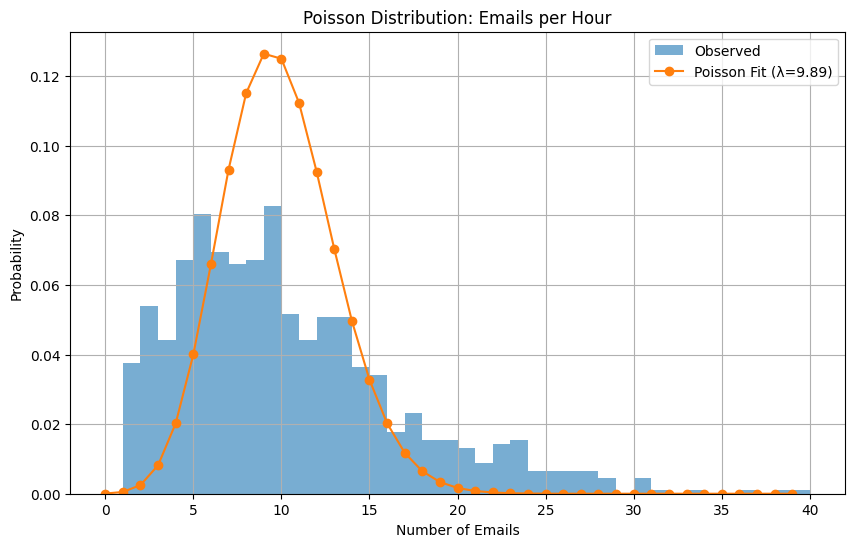

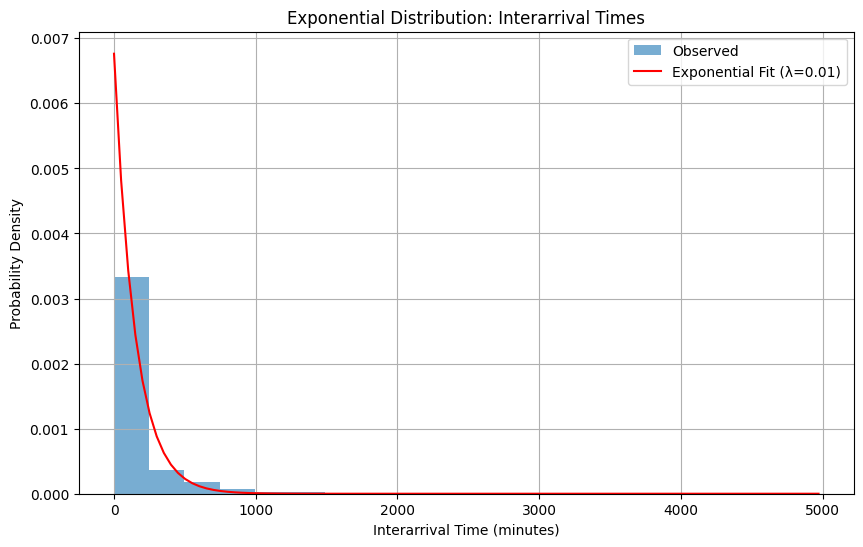

Poisson Distribution (λ): 9.89
Exponential Distribution (λ): 0.01 (mean interarrival time: 147.87 minutes)


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, expon

# Load the cleaned email metadata
file_path = 'cleaned_emails_metadata.csv'  # Update this with your cleaned file path
emails_df = pd.read_csv(file_path)

# Convert 'Date' column to datetime if not already
emails_df['Date'] = pd.to_datetime(emails_df['Date'], utc=True)

# Ensure the data is sorted by date
emails_df = emails_df.sort_values(by='Date')

### 1. Poisson Distribution Analysis
# Group emails by hourly intervals
emails_df['Day'] = emails_df['Date'].dt.floor('D')  # Group by hour
email_counts = emails_df.groupby('Day').size()  # Count emails per hour

# Compute the mean of email counts (λ parameter for Poisson distribution)
lambda_poisson = email_counts.mean()

# Plot observed vs Poisson fit
plt.figure(figsize=(10, 6))
plt.hist(email_counts, bins=range(0, max(email_counts) + 2), alpha=0.6, label='Observed', density=True)
x = np.arange(0, max(email_counts) + 1)
plt.plot(x, poisson.pmf(x, lambda_poisson), 'o-', label=f'Poisson Fit (λ={lambda_poisson:.2f})')
plt.title('Poisson Distribution: Emails per Hour')
plt.xlabel('Number of Emails')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

### 2. Exponential Distribution Analysis
# Calculate interarrival times (in minutes)
emails_df['Interarrival Time'] = emails_df['Date'].diff().dt.total_seconds() / 60
interarrival_times = emails_df['Interarrival Time'].dropna()

# Fit Exponential Distribution
lambda_exponential = 1 / interarrival_times.mean()

# Plot observed vs Exponential fit
plt.figure(figsize=(10, 6))
plt.hist(interarrival_times, bins=20, density=True, alpha=0.6, label='Observed')
x = np.linspace(0, interarrival_times.max(), 100)
plt.plot(x, expon.pdf(x, scale=1/lambda_exponential), 'r-', label=f'Exponential Fit (λ={lambda_exponential:.2f})')
plt.title('Exponential Distribution: Interarrival Times')
plt.xlabel('Interarrival Time (minutes)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### Print Summary
print(f"Poisson Distribution (λ): {lambda_poisson:.2f}")
print(f"Exponential Distribution (λ): {lambda_exponential:.2f} (mean interarrival time: {1/lambda_exponential:.2f} minutes)")


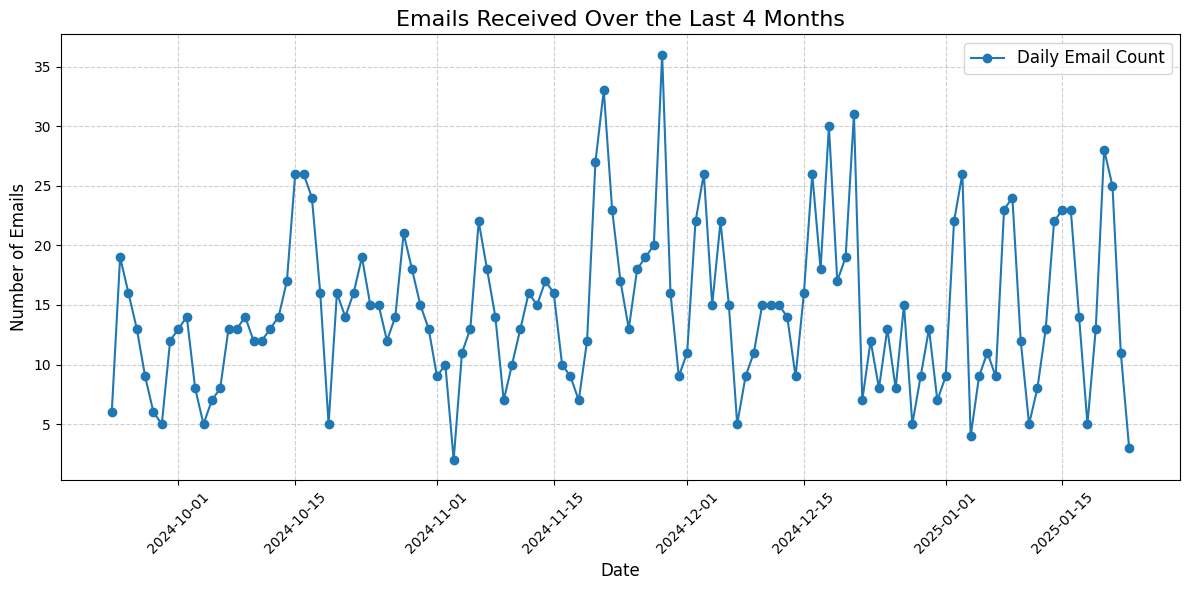

In [29]:
import matplotlib.pyplot as plt

# Filter data for the last 4 months
latest_date = emails_df['Date'].max()
four_months_ago = latest_date - pd.DateOffset(months=4)
last_4_months_data = emails_df[emails_df['Date'] >= four_months_ago]

# Group by day and count emails
daily_email_counts = last_4_months_data.groupby(last_4_months_data['Date'].dt.date).size()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(daily_email_counts.index, daily_email_counts.values, marker='o', linestyle='-', label='Daily Email Count')
plt.title('Emails Received Over the Last 4 Months', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Emails', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [30]:
four_months_ago

Timestamp('2024-09-23 09:07:11+0000', tz='UTC')

In [31]:
last_4_months_data

,Sender,Recipient,Subject,Date,Day,Hour,Day of Week,Interarrival Time
880,nyheter@info.compricer.se,ra.derakhshan@gmail.com,Sänk kostnaden för dinhusbilsförsäkring – det ...,2024-09-23 09:38:09+00:00,2024-09-23 00:00:00+00:00,9,Monday,80.766667
1487,no-reply@lanekoll.se,ra.derakhshan@gmail.com,Du har ett nytt meddelande att läsa!,2024-09-23 10:06:23+00:00,2024-09-23 00:00:00+00:00,10,Monday,28.233333
905,kundservice@flygupplevelse.com,ra.derakhshan@gmail.com,Home Test Com1,2024-09-23 11:57:37+00:00,2024-09-23 00:00:00+00:00,11,Monday,111.233333
683,invitations@linkedin.com,ra.derakhshan@gmail.com,"Reza, please add me to your LinkedIn network",2024-09-23 12:38:34+00:00,2024-09-23 00:00:00+00:00,12,Monday,40.950000
1661,messages-noreply@linkedin.com,ra.derakhshan@gmail.com,Your profile is being seen. Review searchers.,2024-09-23 17:29:05+00:00,2024-09-23 00:00:00+00:00,17,Monday,290.516667
...,...,...,...,...,...,...,...,...
450,nyhetsbrev@xxl.se,ra.derakhshan@gmail.com,Nattskiftet startar NU - Endast 14 timmar! ⏳,2025-01-22 19:02:32+00:00,2025-01-22 00:00:00+00:00,19,Wednesday,72.883333
449,nyhetsbrev@xxl.se,ra.derakhshan@gmail.com,Nattskiftet startar NU - Endast 14 timmar! ⏳,2025-01-22 19:02:56+00:00,2025-01-22 00:00:00+00:00,19,Wednesday,0.400000
1718,nyhetsbrev@xxl.se,ra.derakhshan@gmail.com,30% superbonus på allt från Nike och adidas*!🔥,2025-01-23 07:11:06+00:00,2025-01-23 00:00:00+00:00,7,Thursday,728.166667
124,noreply@msg.jobylon.com,ra.derakhshan@gmail.com,Du har redan sökt detta jobb,2025-01-23 08:50:41+00:00,2025-01-23 00:00:00+00:00,8,Thursday,99.583333


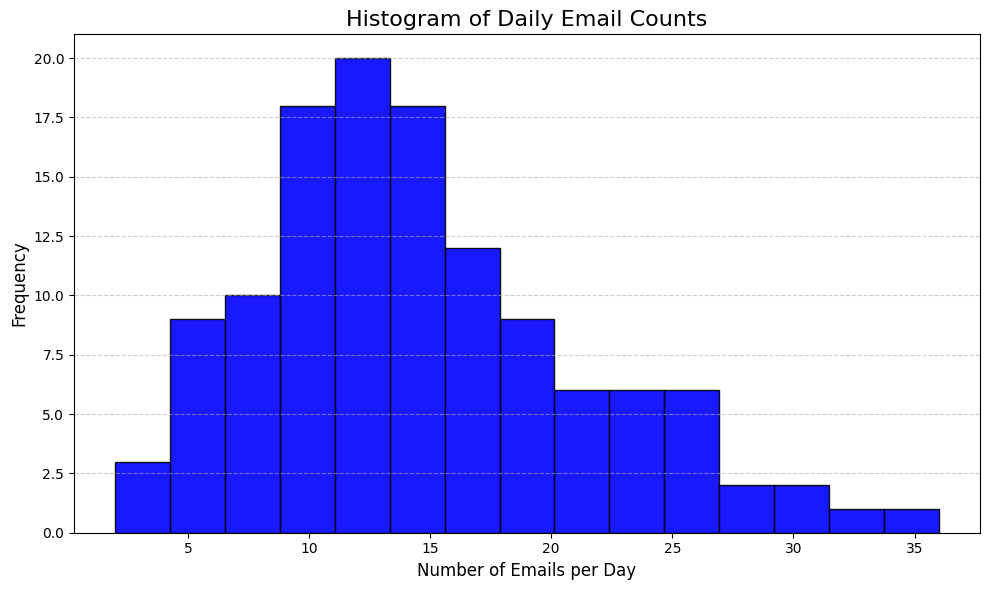

In [38]:
# Plot the histogram of daily email counts
plt.figure(figsize=(10, 6))
plt.hist(daily_email_counts.values, bins=15, alpha=0.9, color='blue', edgecolor='black')
plt.title('Histogram of Daily Email Counts', fontsize=16)
plt.xlabel('Number of Emails per Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## SimPy simulation for email

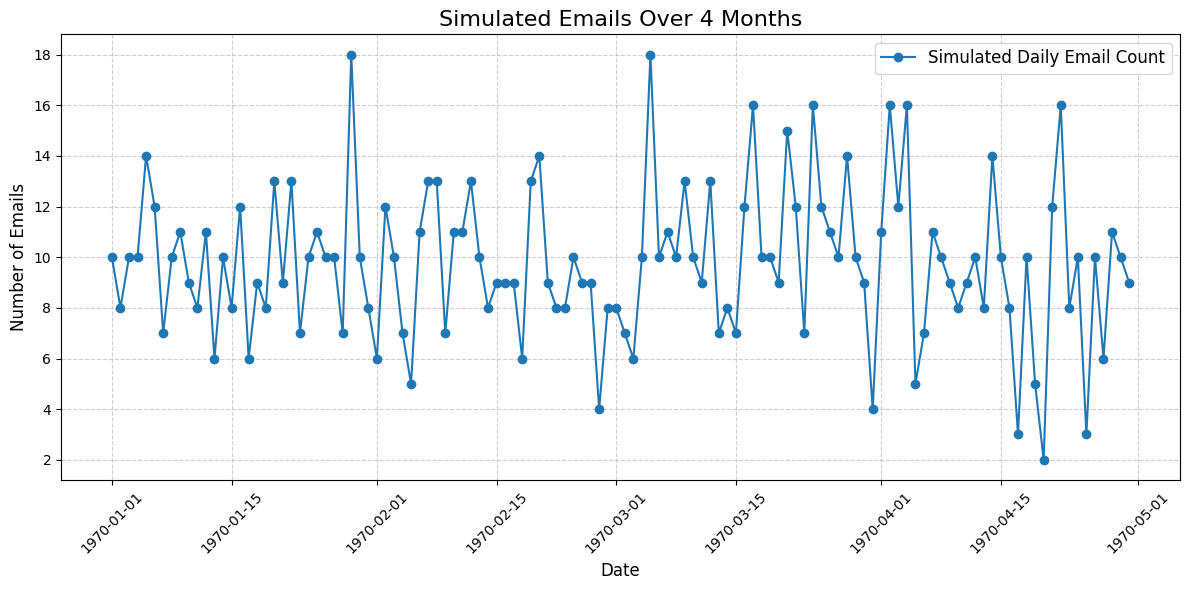

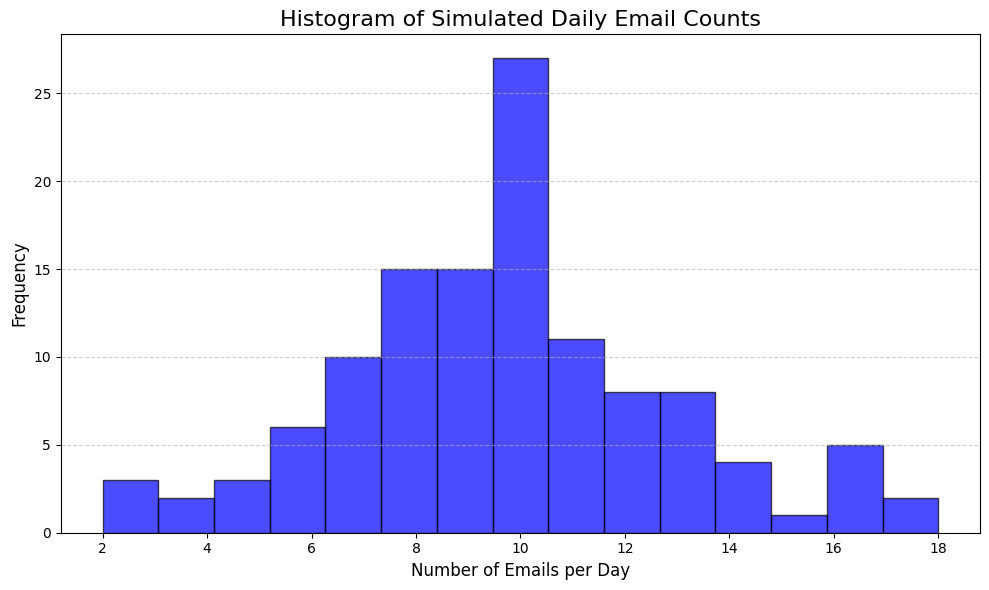

Simulated total emails: 1170
Mean emails per day (simulated): 9.75


In [39]:
import simpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the email arrival process
def email_arrival(env, arrival_rate, email_log):
    """
    Simulate email arrivals based on the Poisson process.
    Args:
    - env: SimPy environment
    - arrival_rate: Emails per day (λ)
    - email_log: List to log email arrival times
    """
    while True:
        # Generate interarrival time using exponential distribution
        interarrival_time = np.random.exponential(1 / arrival_rate)
        yield env.timeout(interarrival_time)  # Wait for the next arrival
        
        # Log the arrival time
        email_log.append(env.now)

# Initialize simulation parameters
arrival_rate_per_hour = 9.89 / 24  # Convert λ from daily to hourly
simulation_days = 120  # Simulate for 4 months (~120 days)
total_hours = simulation_days * 24  # Convert simulation duration to hours

# Create the SimPy environment
env = simpy.Environment()

# List to store email arrival times
email_log = []

# Start the email arrival process
env.process(email_arrival(env, arrival_rate_per_hour, email_log))

# Run the simulation
env.run(until=total_hours)

# Convert the email log (hours since start) to a pandas DataFrame
email_times = pd.DataFrame({'Arrival Hour': email_log})
email_times['Arrival Time'] = pd.to_datetime(email_times['Arrival Hour'] / 24, unit='D')

# Group by day and count emails
email_times['Day'] = email_times['Arrival Time'].dt.date
daily_counts = email_times.groupby('Day').size()

# Plot the simulation results
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', label='Simulated Daily Email Count')
plt.title('Simulated Emails Over 4 Months', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Emails', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plot histogram of simulated daily email counts
plt.figure(figsize=(10, 6))
plt.hist(daily_counts.values, bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Simulated Daily Email Counts', fontsize=16)
plt.xlabel('Number of Emails per Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Simulated total emails: {len(email_log)}")
print(f"Mean emails per day (simulated): {daily_counts.mean():.2f}")


## Binomial distribution

In [51]:
from scipy.stats import binom

# Parameters
n = 10  # Number of trials
p = 1/6  # Probability of success
k = 3  # Number of successes

# Probability of exactly 3 successes
probability = binom.pmf(k, n, p)
print(f"P(X = {k}): {probability:.3f}")

# Cumulative probability (e.g., P(X ≤ 3))
cumulative_probability = binom.cdf(k, n, p)
print(f"P(X ≤ {k}): {cumulative_probability:.3f}")

P(X = 3): 0.155
P(X ≤ 3): 0.930


In [64]:
for k in range(1,7):
    n=10
    p = 1/6
    probability = binom.pmf(k,n,p)
    cumulative_prob = binom.cdf(k,n,p)
    
    print(f'P(X = {k}): {probability:.3f}')
    print(f'P(X <= {k}): {cumulative_prob:.3f}')
    print()

P(X = 1): 0.323
P(X <= 1): 0.485

P(X = 2): 0.291
P(X <= 2): 0.775

P(X = 3): 0.155
P(X <= 3): 0.930

P(X = 4): 0.054
P(X <= 4): 0.985

P(X = 5): 0.013
P(X <= 5): 0.998

P(X = 6): 0.002
P(X <= 6): 1.000



In [58]:
1/6

0.16666666666666666